## 데이터 준비

In [48]:
### 구글 서버와 내 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# 현재 작업 경로 변경하기
%cd '/content/drive/MyDrive/KDT/정형데이터분석시각화'

/content/drive/MyDrive/KDT/정형데이터분석시각화


In [50]:
# 필요한 라이브러리 임폴트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
### 데이터 불러오기

# 파일 경로 설정
train_file = 'titanic_train.csv'
test_file = 'titanic_test.csv'

# csv file --> dataframe 자료형 생성
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

# 학습용 train_df 결과 확인
print(train_df)

print('-'*80)

# 평가용 test_df 결과 확인
print(test_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Gender   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

### 4/4 실습

In [52]:
### 학습용 / 평가용 데이터의 컬럼 확인
train_columns = train_df.columns
test_columns = test_df.columns
print(f'학습용 데이터의 컬럼 항목 : \n{train_columns}')
print('-'*80)
print(f'평가용 데이터의 컬럼 항목 : \n{test_columns}')

학습용 데이터의 컬럼 항목 : 
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
--------------------------------------------------------------------------------
평가용 데이터의 컬럼 항목 : 
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [53]:
### 데이터 병합하기
df = pd.concat([train_df, test_df], axis=0, ignore_index=True)
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [54]:
### 데이터의 전반적인 정보 확인

'''
## 컬럼 정보
Survived : 생존 여부
Pclass : Passenger Class, 승객 등급
Name : 승객 이름
Gender : 승객 성별
Age : 승객 나이
SibSp : 탑승 한 형제/배우자 수
Parch : 탑승 한 부모/자녀 수
Ticket : 티켓 번호
Fare : 승객 지불 요금
Cabin : 선실 이름
Embarked : 승선항 (C = 쉘 부르그, Q = 퀸즈타운, S = 사우스 햄튼)
'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


### 데이터의 항목별 개수 확인

In [55]:
# 대상 컬럼 : Survived, Pclass, Gender, Fare, Embarked

# Survived 컬럼
print(f'Survived 컬럼의 항목별 개수 : \n{df.Survived.value_counts()}')

print('-'*80)

# Pclass 컬럼
print(f'Pclass 컬럼의 항목별 개수 : \n{df.Pclass.value_counts()}')

print('-'*80)

# Gender 컬럼
print(f'Gender 컬럼의 항목별 개수 : \n{df.Gender.value_counts()}')

print('-'*80)

# Fare 컬럼
print(f'Fare 컬럼의 항목별 개수 : \n{df.Fare.value_counts()}')

print('-'*80)

# Embarked 컬럼
print(f'Embarked 컬럼의 항목별 개수 : \n{df.Embarked.value_counts()}')

print('-'*80)

# Embarked 컬럼
print(f'Embarked 컬럼의 항목별 비율 : \n{df.Embarked.value_counts(normalize=True)}')

Survived 컬럼의 항목별 개수 : 
0    815
1    494
Name: Survived, dtype: int64
--------------------------------------------------------------------------------
Pclass 컬럼의 항목별 개수 : 
3    709
1    323
2    277
Name: Pclass, dtype: int64
--------------------------------------------------------------------------------
Gender 컬럼의 항목별 개수 : 
male      843
female    466
Name: Gender, dtype: int64
--------------------------------------------------------------------------------
Fare 컬럼의 항목별 개수 : 
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: Fare, Length: 281, dtype: int64
--------------------------------------------------------------------------------
Embarked 컬럼의 항목별 개수 : 
S    914
C    270
Q    123
Name: Embarked, dtype: int64
--------------------------------------------------------------------------------
Embarked 컬럼의 항목별 비율 : 
S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dty

## 데이터 전처리

### 누락 데이터 처리

In [56]:
### 누락 데이터 확인 --> isnull().sum()

# isnull() --> 컬럼 별 데이터의 누락 여부를 확인 --> boolean 배열 생성
null1 = df.isnull()
print(null1)

print('-'*80)

# 컬럼 별 누락 데이터의 개수 확인 --> sum()
num_nulls = df.isnull().sum()

# 결과 확인하기
print(num_nulls)

      PassengerId  Survived  Pclass   Name  Gender    Age  SibSp  Parch  \
0           False     False   False  False   False  False  False  False   
1           False     False   False  False   False  False  False  False   
2           False     False   False  False   False  False  False  False   
3           False     False   False  False   False  False  False  False   
4           False     False   False  False   False  False  False  False   
...           ...       ...     ...    ...     ...    ...    ...    ...   
1304        False     False   False  False   False   True  False  False   
1305        False     False   False  False   False  False  False  False   
1306        False     False   False  False   False  False  False  False   
1307        False     False   False  False   False   True  False  False   
1308        False     False   False  False   False   True  False  False   

      Ticket   Fare  Cabin  Embarked  
0      False  False   True     False  
1      False  False  

#### Cabin 컬럼

In [57]:
### Cabin 컬럼 제거
cleaned_df = df.drop(columns=['Cabin'])

# 결과 확인하기
cleaned_df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


#### Age 컬럼

In [58]:
### 중간 값으로 대체

# Age 컬럼의 중간값 --> pd.Age.median()
median = cleaned_df.Age.median()
print(median)

# Age 컬럼의 결측치를 평균 나이로 대체
cleaned_df.Age.fillna(median, inplace=True)

# Age 컬럼의 누락 데이터의 개수
print(cleaned_df.Age.isnull().sum())

28.0
0


##### Binning

In [59]:
### describe() --> 요약 통계량 확인하기
cleaned_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.503186,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,12.905241,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [60]:
cleaned_df.Age

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1304    28.0
1305    39.0
1306    38.5
1307    28.0
1308    28.0
Name: Age, Length: 1309, dtype: float64

In [61]:
### Age 컬럼 --> 8단계 범주형 데이터로 변환

# 매개변수
x = cleaned_df.Age
bins = 8
labels = [0, 10, 20 ,30, 40, 50, 60, 70]

# 데이터 변환
cleaned_df.Age = pd.cut(x=x, bins=bins, labels=labels)

# 결과 확인하기 --> value_counts
print(f'범주화의 결과(빈도수) : \n{cleaned_df.Age.value_counts()}')
print('-'*80)
print(f'범주화의 결과(비율) : \n{cleaned_df.Age.value_counts(normalize=True)}')


범주화의 결과(빈도수) : 
20    624
30    210
10    162
40    132
0      86
50     62
60     27
70      6
Name: Age, dtype: int64
--------------------------------------------------------------------------------
범주화의 결과(비율) : 
20    0.476700
30    0.160428
10    0.123759
40    0.100840
0     0.065699
50    0.047364
60    0.020626
70    0.004584
Name: Age, dtype: float64


#### Embarked 컬럼

In [62]:
### 승선 항구의 분포 비율 확인하기
print(f'승선 항구의 분포 비율 : \n{cleaned_df.Embarked.value_counts(normalize=True)}')

승선 항구의 분포 비율 : 
S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64


In [63]:
### 누락 데이터 처리 --> 최빈값으로 채우기
cleaned_df.Embarked.fillna('S', inplace=True)

# Embarked 컬럼의 누락 데이터 개수
print(cleaned_df.Embarked.isnull().sum())

0


#### Fara 컬럼

In [64]:
### 상관 행렬 구하기
corr_matrix = cleaned_df.corr(method='spearman')

# 결과 확인하기
corr_matrix

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
PassengerId,1.000000,-0.020370,-0.039921,-0.032295,-0.006191,-0.003583
Survived,-0.020370,1.000000,-0.262977,0.108273,0.165864,0.285094
Pclass,-0.039921,-0.262977,1.000000,-0.066679,-0.028752,-0.709019
SibSp,-0.032295,0.108273,-0.066679,1.000000,0.438373,0.445566
Parch,-0.006191,0.165864,-0.028752,0.438373,1.000000,0.400301
Fare,-0.003583,0.285094,-0.709019,0.445566,0.400301,1.000000


In [65]:
### Fare 컬럼에서 누락 데이터 확인 --> loc 인덱서 + boolean 인덱싱
null = cleaned_df.loc[cleaned_df.Fare.isnull(), :]
null

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
1043,1044,0,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,S


In [66]:
### 3등석 요금의 평균 값 구하기

# 3등석 승객의 요금 추출
pclass3_fare = cleaned_df.loc[cleaned_df.Pclass==3, 'Fare']
print(pclass3_fare)

print('-'*80)

# 3등석 요금의 평균 구하기
mean = pclass3_fare.mean()
print(f'3등석의 평균 요금 = {mean}')

0        7.2500
2        7.9250
4        8.0500
5        8.4583
7       21.0750
         ...   
1303     7.7750
1304     8.0500
1306     7.2500
1307     8.0500
1308    22.3583
Name: Fare, Length: 709, dtype: float64
--------------------------------------------------------------------------------
3등석의 평균 요금 = 13.302888700564973


In [67]:
### 3등석 요금의 평균값 --> 자리수 변경 --> round()
fare = round(13.302888700564973, 4)
print(fare)

13.3029


In [68]:
### Fare 컬럼 누락 데이터 채우기
cleaned_df.Fare.fillna(fare, inplace=True)

# 결과 확인하기
cleaned_df.iloc[1043, :]

PassengerId                  1044
Survived                        0
Pclass                          3
Name           Storey, Mr. Thomas
Gender                       male
Age                            60
SibSp                           0
Parch                           0
Ticket                       3701
Fare                      13.3029
Embarked                        S
Name: 1043, dtype: object

### Feature Engineering

#### Name 컬럼 세분화

In [69]:
### Name 컬럼 확인하기

'''
# 이름의 구성 : 성, 호칭. 이름
'''

# Name 컬럼의 값 확인
cleaned_df.Name

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [70]:
### split() 함수 --> '호칭' 추출

test_name = cleaned_df.Name[0]
print(test_name)

print('-'*80)

splited = test_name.split(',')
print(splited)

print('-'*80)

# '성'을 제외한 나머지 부분 --> splited[1]
honorific = splited[1].split('.')[0]
print(honorific)

print('-'*80)

# 이름 --> 호칭 추출
print(test_name.split(',')[1].split('.')[0].strip())

Braund, Mr. Owen Harris
--------------------------------------------------------------------------------
['Braund', ' Mr. Owen Harris']
--------------------------------------------------------------------------------
 Mr
--------------------------------------------------------------------------------
Mr


In [71]:
### strip() 함수 --> 문자열의 앞/뒤 공백 제거

string = ' 수요일'
print(f'공백 제거하기 전 : \n{string}')
print('-'*80)
print(f'공백 제거한 후 : \n{string.strip()}')

공백 제거하기 전 : 
 수요일
--------------------------------------------------------------------------------
공백 제거한 후 : 
수요일


In [72]:
### Name 컬럼의 이름을 분할하여 새로운 컬럼 생성하기

'''
1. Name 컬럼의 이름 --> split().strip() --> 분할 & 공백 제거
2. 중간 호칭만 추출
  1) 'Rev', 'Col', 'Major', 'Dr', 'Capt', 'Sir' : 직위 표현
  2) 'Ms', 'Mme', 'Mrs', 'Dona' : 여성 표현
  3) 'Miss', 'Mlle', 'Lady' : 젊은 여성 표현
  4) 'Mr', 'Don' : 남성 표현
  5) 'Master' : 주로 청소년 이하 결혼하지 않은 남성
  6) 'Jonkheer', 'the Countess' : 귀족 표현
3. 경어(honorific) 컬럼 생성
'''

# Name 컬럼의 이름 분할 함수 정의
def split_title(name):
    # ','로 잘라낸 값 --> 2번째 값 --> '.'로 잘라낸 값 --> 첫번째 값 --> strip()
    return name.split(',')[1].split('.')[0].strip()

# apply(split_title) 적용 --> 새로운 컬럼 생성
cleaned_df['honorific'] = cleaned_df.Name.apply(split_title)

# 결과 확인하기
cleaned_df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,honorific
0,1,0,3,"Braund, Mr. Owen Harris",male,20,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,30,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,20,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,30,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,30,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,20,0,0,A.5. 3236,8.0500,S,Mr
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,30,0,0,PC 17758,108.9000,C,Dona
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,30,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr
1307,1308,0,3,"Ware, Mr. Frederick",male,20,0,0,359309,8.0500,S,Mr


#### honorific 컬럼 정리

In [73]:
### honorific 컬럼의 항목별 개수 확인
print(cleaned_df.honorific.value_counts()) 

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: honorific, dtype: int64


In [74]:
### honorific 컬럼에서 Mr 또는 Miss 또는 Mrs 또는 Master가 아닌 값 추출 --> other
cleaned_df.loc[~((cleaned_df['honorific']=='Mr') |
                 (cleaned_df['honorific']=='Miss') |
                 (cleaned_df['honorific']=='Mrs') |
                 (cleaned_df['honorific']=='Master')), 'honorific'] = 'other'

In [75]:
### 결과 확인하기
cleaned_df.honorific.value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: honorific, dtype: int64

In [76]:
# 또다른 방법
cleaned_df.loc[(cleaned_df.honorific!='Mr') &
               (cleaned_df.honorific!='Miss') &
               (cleaned_df.honorific!='Mrs') &
               (cleaned_df.honorific!='Master'), 'honorific'] = 'other'

cleaned_df.honorific.value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: honorific, dtype: int64

#### 가족 인원수 컬럼 추가

In [77]:
### SibSp 컬럼 값과 Parch 컬럼 값을 더하여 전체 데이터에 대해서 가족 인원수 컬럼 생성하기

cleaned_df['num_family'] = cleaned_df.SibSp + cleaned_df.Parch

# 결과 확인하기
cleaned_df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,honorific,num_family
0,1,0,3,"Braund, Mr. Owen Harris",male,20,1,0,A/5 21171,7.2500,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,30,1,0,PC 17599,71.2833,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,20,0,0,STON/O2. 3101282,7.9250,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,30,1,0,113803,53.1000,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,30,0,0,373450,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,20,0,0,A.5. 3236,8.0500,S,Mr,0
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,30,0,0,PC 17758,108.9000,C,other,0
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,30,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr,0
1307,1308,0,3,"Ware, Mr. Frederick",male,20,0,0,359309,8.0500,S,Mr,0


In [78]:
### 가족 인원수 컬럼의 항목별 개수 확인
cleaned_df.num_family.value_counts(normalize=True)

0     0.603514
1     0.179526
2     0.121467
3     0.032850
5     0.019099
4     0.016807
6     0.012223
10    0.008403
7     0.006112
Name: num_family, dtype: float64

#### 홀로 승선했는지 여부를 새로운 변수로 추가

In [79]:
### alone 컬럼 추가

'''
# num_family == 0 --> True
# num_family != 0 --> False
'''

# alone 컬럼 추가하고 0을 저장
cleaned_df['alone'] = 0

# 결과 확인하기
# cleaned_df

# alone 컬럼 값 --> 수정
cleaned_df.loc[cleaned_df.num_family == 0, 'alone'] = 1

# 결과 확인하기
cleaned_df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,honorific,num_family,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,20,1,0,A/5 21171,7.2500,S,Mr,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,30,1,0,PC 17599,71.2833,C,Mrs,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,20,0,0,STON/O2. 3101282,7.9250,S,Miss,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,30,1,0,113803,53.1000,S,Mrs,1,0
4,5,0,3,"Allen, Mr. William Henry",male,30,0,0,373450,8.0500,S,Mr,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,20,0,0,A.5. 3236,8.0500,S,Mr,0,1
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,30,0,0,PC 17758,108.9000,C,other,0,1
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,30,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr,0,1
1307,1308,0,3,"Ware, Mr. Frederick",male,20,0,0,359309,8.0500,S,Mr,0,1


#### 불필요한 변수 삭제

In [80]:
### 삭제의 대상이 되는 컬럼 : PassengerId, Name, SibSp, Parch, Ticket

cleaned_df = cleaned_df.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket'])

# 결과 확인하기
cleaned_df

,Survived,Pclass,Gender,Age,Fare,Embarked,honorific,num_family,alone
0,0,3,male,20,7.2500,S,Mr,1,0
1,1,1,female,30,71.2833,C,Mrs,1,0
2,1,3,female,20,7.9250,S,Miss,0,1
3,1,1,female,30,53.1000,S,Mrs,1,0
4,0,3,male,30,8.0500,S,Mr,0,1
...,...,...,...,...,...,...,...,...,...
1304,0,3,male,20,8.0500,S,Mr,0,1
1305,1,1,female,30,108.9000,C,other,0,1
1306,0,3,male,30,7.2500,S,Mr,0,1
1307,0,3,male,20,8.0500,S,Mr,0,1


#### Label Encoding

In [81]:
cleaned_df.honorific.value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: honorific, dtype: int64

In [82]:
### replace() 함수 사용

# 대상 컬럼 : Gender, Embarked, honorific

cleaned_df = cleaned_df.replace({'female':0, 'male':1, 'C':0, 'Q':1, 'S':2, 'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'other':4})

# 결과 확인하기
cleaned_df

,Survived,Pclass,Gender,Age,Fare,Embarked,honorific,num_family,alone
0,0,3,1,20,7.2500,2,2,1,0
1,1,1,0,30,71.2833,0,3,1,0
2,1,3,0,20,7.9250,2,1,0,1
3,1,1,0,30,53.1000,2,3,1,0
4,0,3,1,30,8.0500,2,2,0,1
...,...,...,...,...,...,...,...,...,...
1304,0,3,1,20,8.0500,2,2,0,1
1305,1,1,0,30,108.9000,0,4,0,1
1306,0,3,1,30,7.2500,2,2,0,1
1307,0,3,1,20,8.0500,2,2,0,1


### 결과 저장하기

In [83]:
### 전처리한 결과를 csv 파일로 저장하기

# 저장 경로 설정하기
file_name = 'titanic_preprocessed.csv'

# df.to_csv(file_name, index=False)
cleaned_df.to_csv(file_name, index=False)

## 데이터 탐색

### 상관관계 분석

In [84]:
### 전처리한 결과 불러오기

# 저장 경로 확인
file_name = 'titanic_preprocessed.csv'

# csv file --> dataframe 자료형으로 변환
df = pd.read_csv(file_name)

# 결과 확인하기
df

,Survived,Pclass,Gender,Age,Fare,Embarked,honorific,num_family,alone
0,0,3,1,20,7.2500,2,2,1,0
1,1,1,0,30,71.2833,0,3,1,0
2,1,3,0,20,7.9250,2,1,0,1
3,1,1,0,30,53.1000,2,3,1,0
4,0,3,1,30,8.0500,2,2,0,1
...,...,...,...,...,...,...,...,...,...
1304,0,3,1,20,8.0500,2,2,0,1
1305,1,1,0,30,108.9000,0,4,0,1
1306,0,3,1,30,7.2500,2,2,0,1
1307,0,3,1,20,8.0500,2,2,0,1


In [85]:
### df.corr(method='spearman')

# 상관 행렬 생성
corr_metrix = df.corr(method='spearman')

# 결과 확인하기
corr_metrix

,Survived,Pclass,Gender,Age,Fare,Embarked,honorific,num_family,alone
Survived,1.000000,-0.262977,-0.688371,-0.028038,0.285085,-0.135825,-0.035252,0.189040,-0.216299
Pclass,-0.262977,1.000000,0.124519,-0.358715,-0.708747,0.116266,-0.200978,-0.089363,0.147386
Gender,-0.688371,0.124519,1.000000,0.051130,-0.241725,0.107595,0.056526,-0.275519,0.284537
Age,-0.028038,-0.358715,0.051130,1.000000,0.176247,-0.027765,0.432392,-0.137568,0.087753
Fare,0.285085,-0.708747,-0.241725,0.176247,1.000000,-0.071638,0.088609,0.521337,-0.523819
Embarked,-0.135825,0.116266,0.107595,-0.027765,-0.071638,1.000000,0.004812,-0.000607,0.039356
honorific,-0.035252,-0.200978,0.056526,0.432392,0.088609,0.004812,1.000000,-0.021536,-0.046355
num_family,0.189040,-0.089363,-0.275519,-0.137568,0.521337,-0.000607,-0.021536,1.000000,-0.963948
alone,-0.216299,0.147386,0.284537,0.087753,-0.523819,0.039356,-0.046355,-0.963948,1.000000


### 탐색적 데이터 분석(EDA)

#### Survived 컬럼

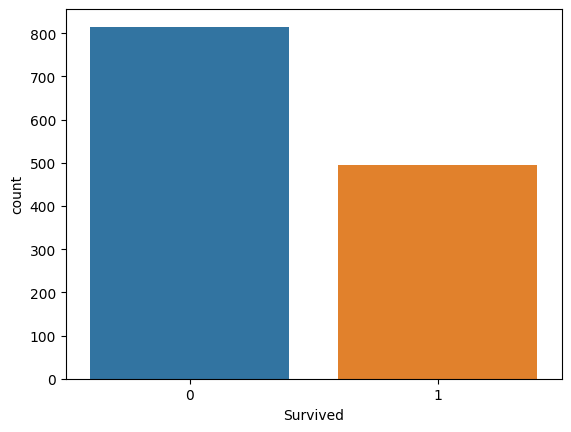

In [86]:
### 사망자 수 / 생존자 수 분포 시각화
sns.countplot(data=df, x='Survived')
plt.show()

In [87]:
### 사망자 수 / 생존자 수 분포 정보 --> 추출

# Survived 컬럼 --> 항목별 빈도수 추출 --> value_counts()
counts = df.Survived.value_counts()
print(f'사망자 수 / 생존자 수 분포 : \n{counts}')

print('-'*80)

# Survived 컬럼 --> 항목별 비율 추출 --> value_counts(normalize=True)
ratio = df.Survived.value_counts(normalize=True)
print(f'사망자 수 / 생존자 수 비율 : \n{ratio}')

사망자 수 / 생존자 수 분포 : 
0    815
1    494
Name: Survived, dtype: int64
--------------------------------------------------------------------------------
사망자 수 / 생존자 수 비율 : 
0    0.622613
1    0.377387
Name: Survived, dtype: float64


#### 생존 여부와 승객 등급의 관계 분석

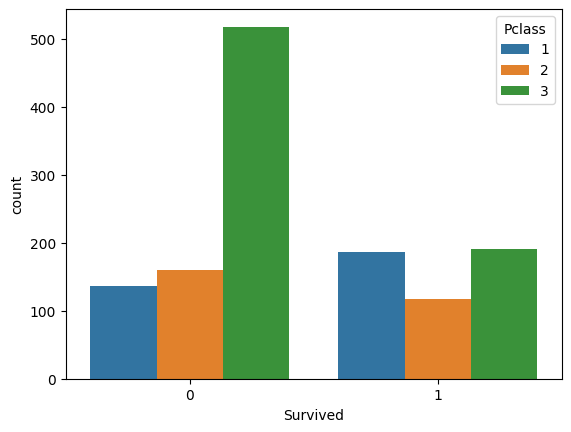

In [88]:
### Survived 컬럼과 Pclass 컬럼의 관계 확인
sns.countplot(data=df, x='Survived', hue='Pclass')
plt.show()

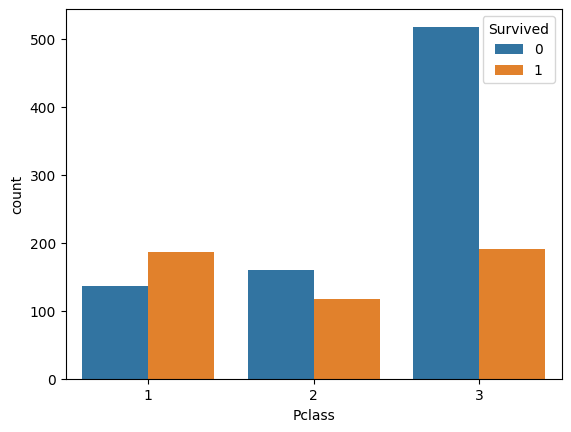

In [89]:
### Survived 컬럼과 Pclass 컬럼의 관계 확인
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.show()

In [93]:
### 승객 등급에 따른 생존자 / 사망자 수 분석

## 1등석

# 1등석 승객 --> 사망자 수 / 생존자 수 추출
pclass1_survived = df.loc[df.Pclass==1, 'Survived'].value_counts()
print(f'1등석 승객 중 사망자 수 / 생존자 수 : \n{pclass1_survived}')

print('-'*80)

# 1등석 승객 --> 사망자 / 생존자 비율 추출
pclass1_survived_ratio = df.loc[df.Pclass==1, 'Survived'].value_counts(normalize=True)
print(f'1등석 승객 중 사망자 / 생존자 비율 : \n{pclass1_survived_ratio}')

print('-'*80)

## 2등석

# 2등석 승객 --> 사망자 수 / 생존자 수 추출
pclass2_survived = df.loc[df.Pclass==2, 'Survived'].value_counts()
print(f'2등석 승객 중 사망자 수 / 생존자 수 : \n{pclass2_survived}')

print('-'*80)

# 2등석 승객 --> 사망자 / 생존자 비율 추출
pclass2_survived_ratio = df.loc[df.Pclass==2, 'Survived'].value_counts(normalize=True)
print(f'2등석 승객 중 사망자 / 생존자 비율 : \n{pclass2_survived_ratio}')

print('-'*80)

## 3등석

# 3등석 승객 --> 사망자 수 / 생존자 수 추출
pclass3_survived = df.loc[df.Pclass==3, 'Survived'].value_counts()
print(f'3등석 승객 중 사망자 수 / 생존자 수 : \n{pclass3_survived}')

print('-'*80)

# 3등석 승객 --> 사망자 / 생존자 비율 추출
pclass3_survived_ratio = df.loc[df.Pclass==3, 'Survived'].value_counts(normalize=True)
print(f'3등석 승객 중 사망자 / 생존자 비율 : \n{pclass3_survived_ratio}')

1등석 승객 중 사망자 수 / 생존자 수 : 
1    186
0    137
Name: Survived, dtype: int64
--------------------------------------------------------------------------------
1등석 승객 중 사망자 / 생존자 비율 : 
1    0.575851
0    0.424149
Name: Survived, dtype: float64
--------------------------------------------------------------------------------
2등석 승객 중 사망자 수 / 생존자 수 : 
0    160
1    117
Name: Survived, dtype: int64
--------------------------------------------------------------------------------
2등석 승객 중 사망자 / 생존자 비율 : 
0    0.577617
1    0.422383
Name: Survived, dtype: float64
--------------------------------------------------------------------------------
3등석 승객 중 사망자 수 / 생존자 수 : 
0    518
1    191
Name: Survived, dtype: int64
--------------------------------------------------------------------------------
3등석 승객 중 사망자 / 생존자 비율 : 
0    0.730606
1    0.269394
Name: Survived, dtype: float64


In [96]:
tmp = pclass1_ratio[0]
pclass1_ratio[0] = pclass1_ratio[1]
pclass1_ratio[1] = tmp
pclass1_ratio

array([0.42414861, 0.57585139])

In [98]:
### 등급별 사망/생존 비율 --> 데이터프레임(표) 생성

# 1등석 승객 --> 사망/생존 비율
pclass1_ratio = pclass1_survived_ratio.values
print(pclass1_ratio)

print('-'*80)

# 2등석 승객 --> 사망/생존 비율
pclass2_ratio = pclass2_survived_ratio.values
print(pclass2_ratio)

print('-'*80)

# 3등석 승객 --> 사망/생존 비율
pclass3_ratio = pclass3_survived_ratio.values
print(pclass3_ratio)

print('-'*80)

# dict 생성
titanic_dict = {'1등석':pclass1_ratio, '2등석':pclass2_ratio, '3등석':pclass3_ratio}
print(titanic_dict)

print('-'*80)

# index 생성
index = ['사망율', '생존률']

print('-'*80)

# dataframe 자료형 생성
df_ps = pd.DataFrame(data=titanic_dict, index=index)

# 결과 확인하기
df_ps

[0.42414861 0.57585139]
--------------------------------------------------------------------------------
[0.57761733 0.42238267]
--------------------------------------------------------------------------------
[0.73060649 0.26939351]
--------------------------------------------------------------------------------
{'1등석': array([0.42414861, 0.57585139]), '2등석': array([0.57761733, 0.42238267]), '3등석': array([0.73060649, 0.26939351])}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


,1등석,2등석,3등석
사망율,0.424149,0.577617,0.730606
생존률,0.575851,0.422383,0.269394


#### 생존 여부와 성별의 관계 분석

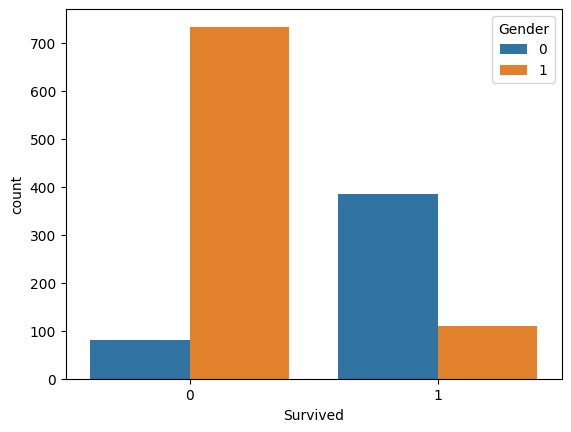

In [99]:
### Survived 컬럼과 Gender 컬럼의 관계 확인

'''
# female : 0, male = 1
'''

sns.countplot(data=df, x='Survived', hue='Gender')
plt.show()

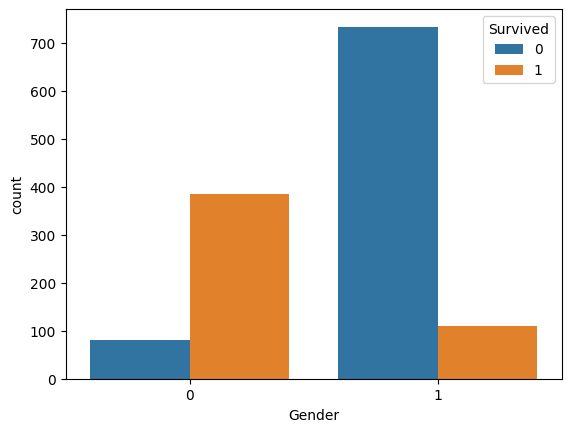

In [100]:
### Survived 컬럼과 Gender 컬럼의 관계 확인

'''
# female : 0, male = 1
'''

sns.countplot(data=df, x='Gender', hue='Survived')
plt.show()

In [101]:
### 성별에 따른 생존자 / 사망자 수 분석

'''
loc 인덱서 + boolean 배열 사용
'''

# 여성 중 사망자 수 / 생존자 수 추출
female_survived = df.loc[df.Gender==0, 'Survived'].value_counts()
print(f'여성 중 사망자 수 / 생존자 수 분포 : \n{female_survived}')

print('-'*80)

# 여성 중 사망자 / 생존자 비율 추출
female_survived_ratio = df.loc[df.Gender==0, 'Survived'].value_counts(normalize=True)
print(f'여성 중 사망자 / 생존자 비율 분포 : \n{female_survived_ratio}')

print('-'*80)

# 남성 중 사망자 수 / 생존자 수 추출
male_survived = df.loc[df.Gender==1, 'Survived'].value_counts()
print(f'남성 중 사망자 수 / 생존자 수 분포 : \n{male_survived}')

print('-'*80)

# 님성 중 사망자 / 생존자 비율 추출
male_survived_ratio = df.loc[df.Gender==1, 'Survived'].value_counts(normalize=True)
print(f'남성 중 사망자 / 생존자 비율 분포 : \n{male_survived_ratio}')

여성 중 사망자 수 / 생존자 수 분포 : 
1    385
0     81
Name: Survived, dtype: int64
--------------------------------------------------------------------------------
여성 중 사망자 / 생존자 비율 분포 : 
1    0.82618
0    0.17382
Name: Survived, dtype: float64
--------------------------------------------------------------------------------
남성 중 사망자 수 / 생존자 수 분포 : 
0    734
1    109
Name: Survived, dtype: int64
--------------------------------------------------------------------------------
남성 중 사망자 / 생존자 비율 분포 : 
0    0.8707
1    0.1293
Name: Survived, dtype: float64


#### 승객 등급과 성별의 관계 문석

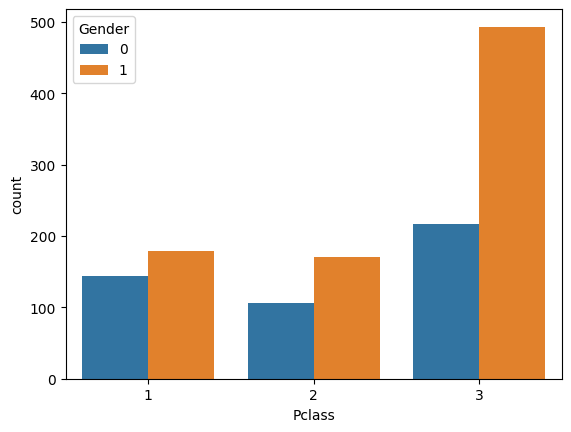

In [102]:
### Pclass와 Gender 컬럼의 관계 분석
sns.countplot(data=df, x='Pclass', hue='Gender')
plt.show()

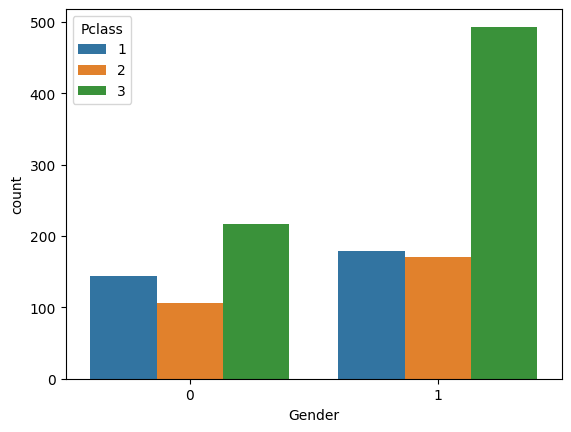

In [103]:
### Gender와 Pclass 컬럼의 관계 분석
sns.countplot(data=df, x='Gender', hue='Pclass')
plt.show()

In [104]:
### 승객 --> 남여 비율
print(df.Gender.value_counts(normalize=True))

1    0.644003
0    0.355997
Name: Gender, dtype: float64


In [105]:
### 승객 --> 등급 비율
print(df.Pclass.value_counts(normalize=True))

3    0.541635
1    0.246753
2    0.211612
Name: Pclass, dtype: float64


In [106]:
### 승객 등급에 따른 성별 분석

# 1등석 승객 --> 성별 분포 --> loc 인덱서 + boolean 배열
pclass1_gender = df.loc[df.Pclass==1, 'Gender'].value_counts()
print(f'1등석 승객 중 성별 분포 : \n{pclass1_gender}')

print('-'*80)

pclass1_gender_ratio = df.loc[df.Pclass==1, 'Gender'].value_counts(normalize=True)
print(f'1등석 승객 중 성별 분포 비율 : \n{pclass1_gender_ratio}')

print('-'*80)

# 2등석 승객 --> 성별 분포 --> loc 인덱서 + boolean 배열
pclass2_gender = df.loc[df.Pclass==2, 'Gender'].value_counts()
print(f'2등석 승객 중 성별 분포 : \n{pclass2_gender}')

print('-'*80)

pclass2_gender_ratio = df.loc[df.Pclass==2, 'Gender'].value_counts(normalize=True)
print(f'2등석 승객 중 성별 분포 비율 : \n{pclass2_gender_ratio}')

print('-'*80)

# 3등석 승객 --> 성별 분포 --> loc 인덱서 + boolean 배열
pclass3_gender = df.loc[df.Pclass==3, 'Gender'].value_counts()
print(f'3등석 승객 중 성별 분포 : \n{pclass3_gender}')

print('-'*80)

pclass3_gender_ratio = df.loc[df.Pclass==3, 'Gender'].value_counts(normalize=True)
print(f'3등석 승객 중 성별 분포 비율 : \n{pclass3_gender_ratio}')

1등석 승객 중 성별 분포 : 
1    179
0    144
Name: Gender, dtype: int64
--------------------------------------------------------------------------------
1등석 승객 중 성별 분포 비율 : 
1    0.55418
0    0.44582
Name: Gender, dtype: float64
--------------------------------------------------------------------------------
2등석 승객 중 성별 분포 : 
1    171
0    106
Name: Gender, dtype: int64
--------------------------------------------------------------------------------
2등석 승객 중 성별 분포 비율 : 
1    0.617329
0    0.382671
Name: Gender, dtype: float64
--------------------------------------------------------------------------------
3등석 승객 중 성별 분포 : 
1    493
0    216
Name: Gender, dtype: int64
--------------------------------------------------------------------------------
3등석 승객 중 성별 분포 비율 : 
1    0.695346
0    0.304654
Name: Gender, dtype: float64


#### 생존 여부와 연령의 관계 분석

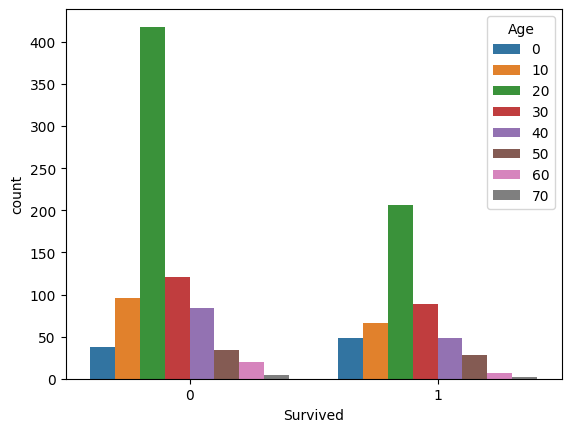

In [107]:
### Survived 컬럼과 Age 컬럼의 관계 확인
sns.countplot(data=df, x='Survived', hue='Age')
plt.show()

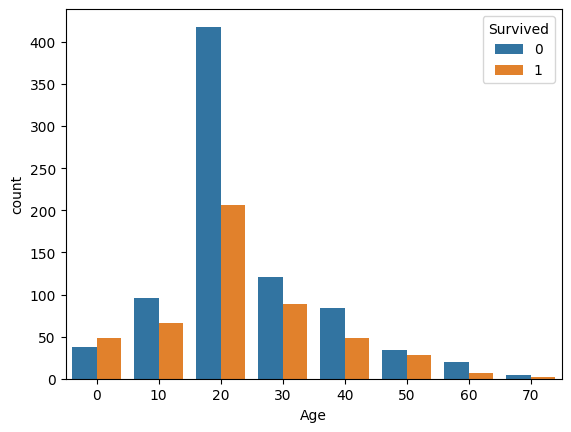

In [108]:
### Age 컬럼과 Survived 컬럼의 관계 확인
sns.countplot(data=df, x='Age', hue='Survived')
plt.show()

In [109]:
### 생존 여부에 따른 연령 분포 분석

# 사망자의 연령 분포 --> loc 인덱서 + boolean 배열
dead_age = df.loc[df.Survived==0, 'Age'].value_counts()
print(f'사망자의 연령 분포 : \n{dead_age}')

print('-'*80)

dead_age_ratio = df.loc[df.Survived==0, 'Age'].value_counts(normalize=True)
print(f'사망자의 연령 분포 비율 : \n{dead_age_ratio}')

print('-'*80)

# 생존자의 연령 분포 --> loc 인덱서 + boolean 배열
alive_age = df.loc[df.Survived==1, 'Age'].value_counts()
print(f'생존자의 연령 분포 : \n{alive_age}')

print('-'*80)

alive_age_ratio = df.loc[df.Survived==1, 'Age'].value_counts(normalize=True)
print(f'생존자의 연령 분포 비율 : \n{alive_age_ratio}')

사망자의 연령 분포 : 
20    418
30    121
10     96
40     84
0      38
50     34
60     20
70      4
Name: Age, dtype: int64
--------------------------------------------------------------------------------
사망자의 연령 분포 비율 : 
20    0.512883
30    0.148466
10    0.117791
40    0.103067
0     0.046626
50    0.041718
60    0.024540
70    0.004908
Name: Age, dtype: float64
--------------------------------------------------------------------------------
생존자의 연령 분포 : 
20    206
30     89
10     66
0      48
40     48
50     28
60      7
70      2
Name: Age, dtype: int64
--------------------------------------------------------------------------------
생존자의 연령 분포 비율 : 
20    0.417004
30    0.180162
10    0.133603
0     0.097166
40    0.097166
50    0.056680
60    0.014170
70    0.004049
Name: Age, dtype: float64


#### 승객의 등급과 연령의 관계 분석

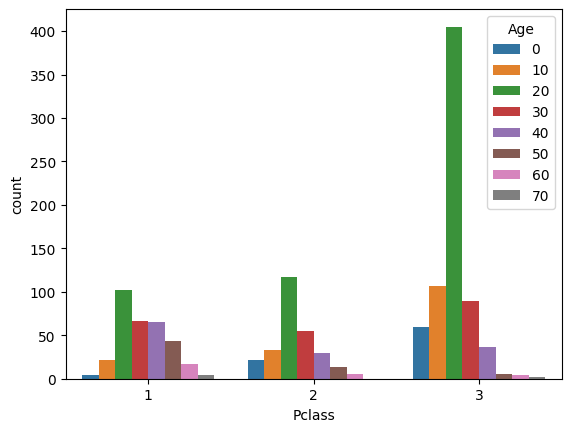

In [110]:
### Pclass 컬럼과 Age 컬럼의 관계 확인
sns.countplot(data=df, x='Pclass', hue='Age')
plt.show()

In [111]:
### 승객 등급에 따른 연령 분포 분석

# 1등석 승객 --> 연령 분포 --> loc 인덱서 + boolean 배열
pclass1_age = df.loc[df.Pclass==1, 'Age'].value_counts()
print(f'1등석 승객의 연령 분포 : \n{pclass1_age}')

print('-'*80)

pclass1_age_ratio = df.loc[df.Pclass==1, 'Age'].value_counts(normalize=True)
print(f'1등석 승객의 연령 분포 비율 : \n{pclass1_age_ratio}')

print('-'*80)

# 2등석 승객 --> 연령 분포 --> loc 인덱서 + boolean 배열
pclass2_age = df.loc[df.Pclass==2, 'Age'].value_counts()
print(f'2등석 승객의 연령 분포 : \n{pclass2_age}')

print('-'*80)

pclass2_age_ratio = df.loc[df.Pclass==2, 'Age'].value_counts(normalize=True)
print(f'2등석 승객의 연령 분포 비율 : \n{pclass2_age_ratio}')

print('-'*80)

# 3등석 승객 --> 연령 분포 --> loc 인덱서 + boolean 배열
pclass3_age = df.loc[df.Pclass==3, 'Age'].value_counts()
print(f'3등석 승객의 연령 분포 : \n{pclass3_age}')

print('-'*80)

pclass3_age_ratio = df.loc[df.Pclass==3, 'Age'].value_counts(normalize=True)
print(f'3등석 승객의 연령 분포 비율 : \n{pclass3_age_ratio}')

1등석 승객의 연령 분포 : 
20    102
30     66
40     65
50     43
10     22
60     17
70      4
0       4
Name: Age, dtype: int64
--------------------------------------------------------------------------------
1등석 승객의 연령 분포 비율 : 
20    0.315789
30    0.204334
40    0.201238
50    0.133127
10    0.068111
60    0.052632
70    0.012384
0     0.012384
Name: Age, dtype: float64
--------------------------------------------------------------------------------
2등석 승객의 연령 분포 : 
20    117
30     55
10     33
40     30
0      22
50     14
60      6
Name: Age, dtype: int64
--------------------------------------------------------------------------------
2등석 승객의 연령 분포 비율 : 
20    0.422383
30    0.198556
10    0.119134
40    0.108303
0     0.079422
50    0.050542
60    0.021661
Name: Age, dtype: float64
--------------------------------------------------------------------------------
3등석 승객의 연령 분포 : 
20    405
10    107
30     89
0      60
40     37
50      5
60      4
70      2
Name: Age, dtype: int64
------

#### 생존 여부와 요금의 관계 분석

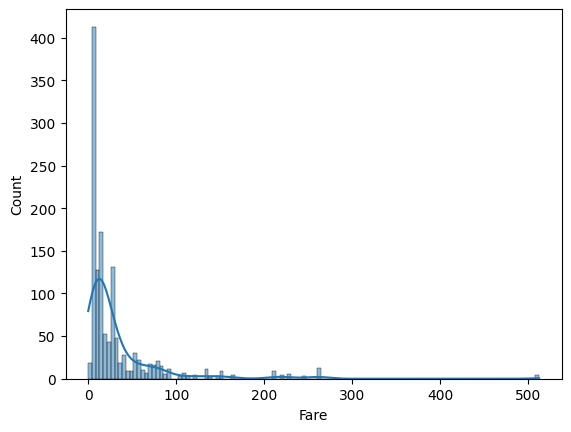

In [112]:
sns.histplot(data=df, x='Fare',kde=True)
plt.show()

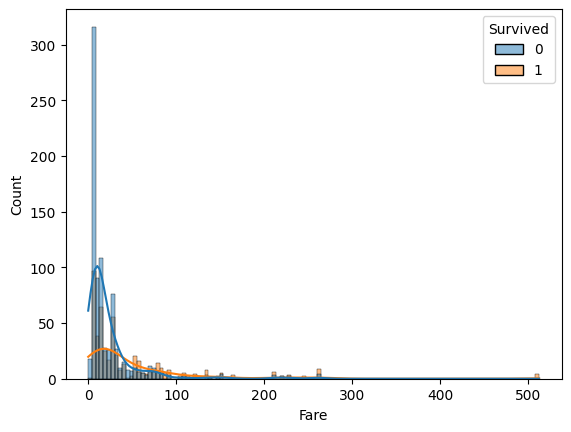

In [113]:
### Survived 컬럼과 Fare 컬럼의 관계 확인
sns.histplot(data=df, x='Fare', hue='Survived', kde=True)
plt.show()

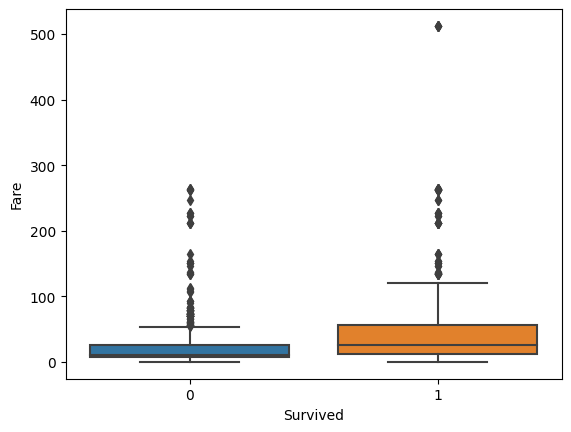

In [114]:
### boxplot을 이용 --> Survived 컬럼과 Fare 컬럼의 관계 확인
sns.boxplot(data=df, x='Survived', y='Fare')
plt.show()

In [115]:
## 사망자의 요금 --> 요약 통계량 추출
df.loc[df.Survived==0, 'Fare'].describe()

count    815.000000
mean      23.866147
std       34.887465
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

In [116]:
## 생존자의 요금 --> 요약 통계량 추출
df.loc[df.Survived==1, 'Fare'].describe()

count    494.000000
mean      48.811497
std       68.594401
min        0.000000
25%       11.431275
50%       26.000000
75%       56.982300
max      512.329200
Name: Fare, dtype: float64

In [117]:
### 생존 여부에 따른 Fare 데이터 추출

# 사망자의 Fare 데이터 추출
dead_fare = df.loc[df.Survived==0, 'Fare']
print(f'사망자의 Fare 데이터 : \n{dead_fare}')

print('-'*80)

# 생존자의 Fare 데이터 추출
alive_fare = df.loc[df.Survived==1, 'Fare']
print(f'생존자의 Fare 데이터 : \n{alive_fare}')

사망자의 Fare 데이터 : 
0         7.2500
4         8.0500
5         8.4583
6        51.8625
7        21.0750
          ...   
1298    211.5000
1304      8.0500
1306      7.2500
1307      8.0500
1308     22.3583
Name: Fare, Length: 815, dtype: float64
--------------------------------------------------------------------------------
생존자의 Fare 데이터 : 
1        71.2833
2         7.9250
3        53.1000
8        11.1333
9        30.0708
          ...   
1300     13.7750
1301      7.7500
1302     90.0000
1303      7.7750
1305    108.9000
Name: Fare, Length: 494, dtype: float64


#### 생존 여부와 가족 인원수의 관계 분석

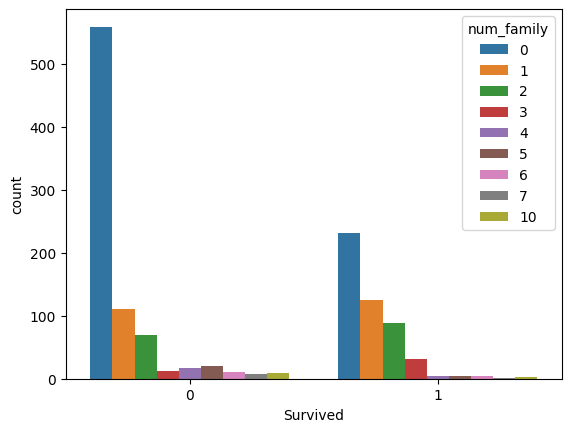

In [118]:
### Survived 컬럼과 num_family 컬럼의 관계 확인
sns.countplot(data=df, x='Survived', hue='num_family')
plt.show()

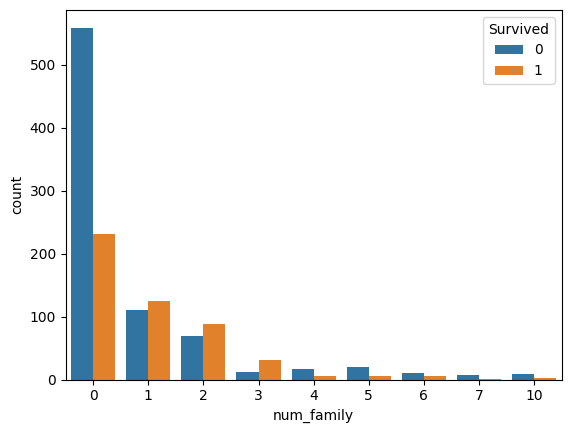

In [119]:
### num_family 컬럼과 Survived 컬럼의 관계 확인
sns.countplot(data=df, x='num_family', hue='Survived')
plt.show()

In [120]:
### 생존 여부에 따른 가족 인원수 분포 분석

# 사망자 --> 가족 인원수 분포
dead_num_family = df.loc[df.Survived==0, 'num_family'].value_counts()
print(f'사망자의 가족 인원수 분포 : \n{dead_num_family}')

print('-'*80)

dead_num_family_ratio = df.loc[df.Survived==0, 'num_family'].value_counts(normalize=True)
print(f'사망자의 가족 인원수 분포 비율 : \n{dead_num_family_ratio}')

print('-'*80)

# 생존자 --> 가족 인원수 분포
alive_num_family = df.loc[df.Survived==1, 'num_family'].value_counts()
print(f'생존자의 가족 인원수 분포 : \n{alive_num_family}')

print('-'*80)

alive_num_family_ratio = df.loc[df.Survived==1, 'num_family'].value_counts(normalize=True)
print(f'생존자의 가족 인원수 분포 비율 : \n{alive_num_family_ratio}')

사망자의 가족 인원수 분포 : 
0     559
1     110
2      70
5      20
4      17
3      12
6      11
10      9
7       7
Name: num_family, dtype: int64
--------------------------------------------------------------------------------
사망자의 가족 인원수 분포 비율 : 
0     0.685890
1     0.134969
2     0.085890
5     0.024540
4     0.020859
3     0.014724
6     0.013497
10    0.011043
7     0.008589
Name: num_family, dtype: float64
--------------------------------------------------------------------------------
생존자의 가족 인원수 분포 : 
0     231
1     125
2      89
3      31
6       5
5       5
4       5
10      2
7       1
Name: num_family, dtype: int64
--------------------------------------------------------------------------------
생존자의 가족 인원수 분포 비율 : 
0     0.467611
1     0.253036
2     0.180162
3     0.062753
6     0.010121
5     0.010121
4     0.010121
10    0.004049
7     0.002024
Name: num_family, dtype: float64


#### 생존 여부와 독신 여부의 관계 분석

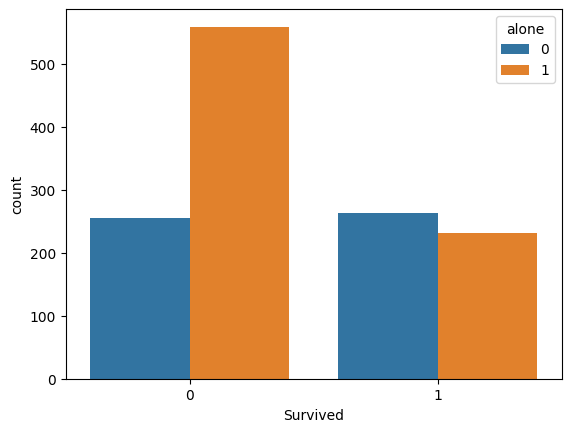

In [121]:
### Survived 컬럼과 alone 컬럼의 관계 확인
sns.countplot(data=df, x='Survived', hue='alone')
plt.show()

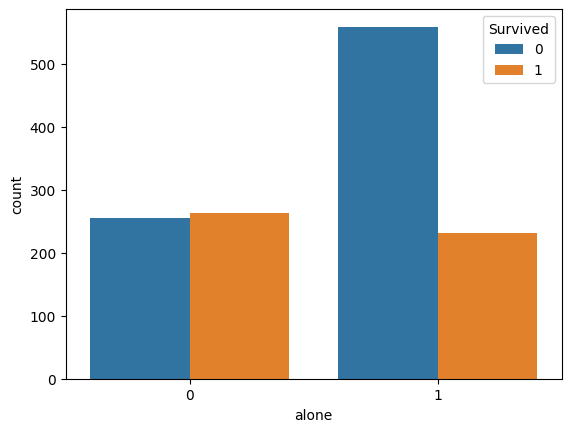

In [122]:
### alone 컬럼과 Survived 컬럼의 관계 확인
sns.countplot(data=df, x='alone', hue='Survived')
plt.show()

In [123]:
### 독신 여부에 따른 사망자 / 생존자 수 분석

# 독신 --> 사망자 / 생존자 분포
alone_survived = df.loc[df.alone==1, 'Survived'].value_counts()
print(f'독신인 경우 사망자 / 생존자 수 분포 : \n{alone_survived}')

print('-'*80)

alone_survived_ratio = df.loc[df.alone==1, 'Survived'].value_counts(normalize=True)
print(f'독신인 경우 사망자 / 생존자 비율 : \n{alone_survived_ratio}')

print('-'*80)

# 가족과 함께 탑승 --> 사망자 / 생존자 분포
not_alone_survived = df.loc[df.alone==0, 'Survived'].value_counts()
print(f'가족과 함께 탑승한 경우 사망자 / 생존자 수 분포 : \n{not_alone_survived}')

print('-'*80)

not_alone_survived_ratio = df.loc[df.alone==0, 'Survived'].value_counts(normalize=True)
print(f'가족과 함께 탑승한 경우 사망자 / 생존자 비율 : \n{not_alone_survived_ratio}')

독신인 경우 사망자 / 생존자 수 분포 : 
0    559
1    231
Name: Survived, dtype: int64
--------------------------------------------------------------------------------
독신인 경우 사망자 / 생존자 비율 : 
0    0.707595
1    0.292405
Name: Survived, dtype: float64
--------------------------------------------------------------------------------
가족과 함께 탑승한 경우 사망자 / 생존자 수 분포 : 
1    263
0    256
Name: Survived, dtype: int64
--------------------------------------------------------------------------------
가족과 함께 탑승한 경우 사망자 / 생존자 비율 : 
1    0.506744
0    0.493256
Name: Survived, dtype: float64


#### 생존 여부와 승선 항구의 관계 분석

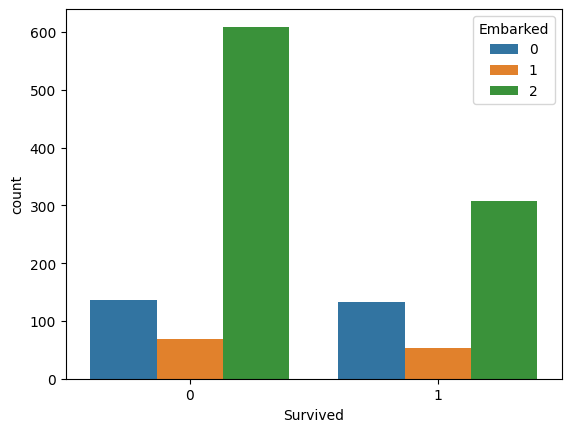

In [124]:
### Survived 컬럼과 Embarked 컬럼의 관계 확인

'''
### Embarked : 'C':0, 'Q':1, 'S':2
'''

sns.countplot(data=df, x='Survived', hue='Embarked')
plt.show()

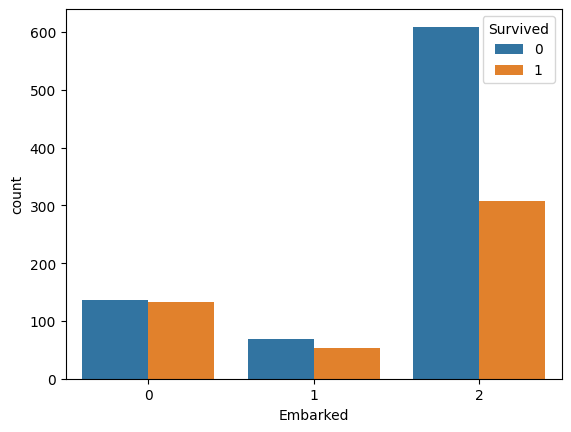

In [125]:
### Embarked 컬럼과 Survived 컬럼의 관계 확인

'''
### Embarked : 'C':0, 'Q':1, 'S':2
'''

sns.countplot(data=df, x='Embarked', hue='Survived')
plt.show()

In [126]:
### 승선 항구별 사망자 / 생존자 수 분석

# 'C' : 쉘 부르그 --> 사망자 / 생존자 수 분석
C_survived = df.loc[df.Embarked==0, 'Survived'].value_counts()
print(f'쉘 부르그 항구의 사망자 / 생존자 수 : \n{C_survived}')

print('-'*80)

C_survived_ratio = df.loc[df.Embarked==0, 'Survived'].value_counts(normalize=True)
print(f'쉘 부르그 항구의 사망자 / 생존자 수 비율 : \n{C_survived_ratio}')

print('-'*80)

# 'Q' : 퀸즈타운 --> 사망자 / 생존자 수 분석
Q_survived = df.loc[df.Embarked==1, 'Survived'].value_counts()
print(f'퀸즈타운 항구의 사망자 / 생존자 수 : \n{Q_survived}')

print('-'*80)

Q_survived_ratio = df.loc[df.Embarked==1, 'Survived'].value_counts(normalize=True)
print(f'퀸즈타운 항구의 사망자 / 생존자 수 비율 : \n{Q_survived_ratio}')

print('-'*80)

# 'S' : 사우스 햄튼 --> 사망자 / 생존자 수 분석
S_survived = df.loc[df.Embarked==2, 'Survived'].value_counts()
print(f'사우스 햄튼 항구의 사망자 / 생존자 수 : \n{S_survived}')

print('-'*80)

S_survived_ratio = df.loc[df.Embarked==2, 'Survived'].value_counts(normalize=True)
print(f'사우스 햄튼 항구의 사망자 / 생존자 수 비율 : \n{S_survived_ratio}')

쉘 부르그 항구의 사망자 / 생존자 수 : 
0    137
1    133
Name: Survived, dtype: int64
--------------------------------------------------------------------------------
쉘 부르그 항구의 사망자 / 생존자 수 비율 : 
0    0.507407
1    0.492593
Name: Survived, dtype: float64
--------------------------------------------------------------------------------
퀸즈타운 항구의 사망자 / 생존자 수 : 
0    69
1    54
Name: Survived, dtype: int64
--------------------------------------------------------------------------------
퀸즈타운 항구의 사망자 / 생존자 수 비율 : 
0    0.560976
1    0.439024
Name: Survived, dtype: float64
--------------------------------------------------------------------------------
사우스 햄튼 항구의 사망자 / 생존자 수 : 
0    609
1    307
Name: Survived, dtype: int64
--------------------------------------------------------------------------------
사우스 햄튼 항구의 사망자 / 생존자 수 비율 : 
0    0.664847
1    0.335153
Name: Survived, dtype: float64


#### 생존 여부와 호칭의 관계 분석

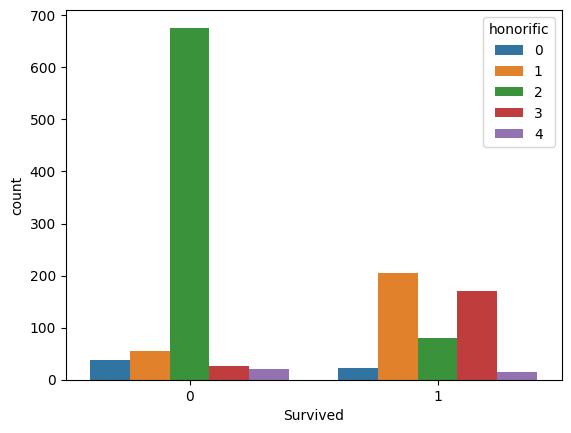

In [127]:
### Survived 컬럼과 honorific 컬럼의 관계 확인

'''
### 'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'other':4
'''

sns.countplot(data=df, x='Survived', hue='honorific')
plt.show()

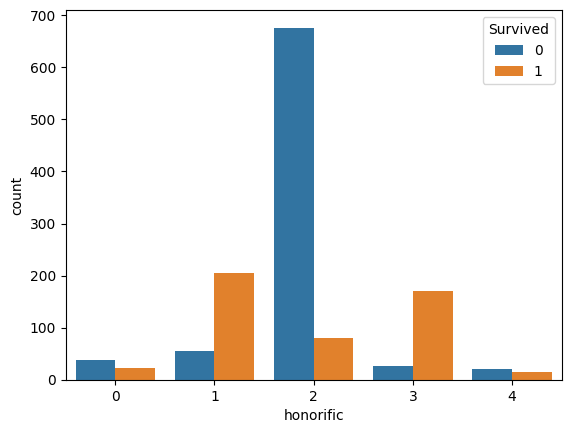

In [128]:
### honorific 컬럼과 Survived 컬럼의 관계 확인

'''
### 'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'other':4
'''

sns.countplot(data=df, x='honorific', hue='Survived')
plt.show()

In [131]:
### 호칭별 생존자 / 사망자 수 분석

# 'Master' --> 생존자 / 사망자 수 분석
master_survived = df.loc[df.honorific==0, 'Survived'].value_counts()
print(f'호칭이 master인 경우 생존자 / 사망자 수 : \n{master_survived}')

print('-'*80)

master_survived_ratio = df.loc[df.honorific==0, 'Survived'].value_counts(normalize=True)
print(f'호칭이 master인 경우 생존자 / 사망자 비율 : \n{master_survived_ratio}')

print('-'*80)

# 'Miss' --> 생존자 / 사망자 수 분석
miss_survived = df.loc[df.honorific==1, 'Survived'].value_counts()
print(f'호칭이 miss인 경우 생존자 / 사망자 수 : \n{miss_survived}')

print('-'*80)

miss_survived_ratio = df.loc[df.honorific==1, 'Survived'].value_counts(normalize=True)
print(f'호칭이 miss인 경우 생존자 / 사망자 비율 : \n{miss_survived_ratio}')

print('-'*80)

# 'Mr' --> 생존자 / 사망자 수 분석
mr_survived = df.loc[df.honorific==2, 'Survived'].value_counts()
print(f'호칭이 mr인 경우 생존자 / 사망자 수 : \n{mr_survived}')

print('-'*80)

mr_survived_ratio = df.loc[df.honorific==2, 'Survived'].value_counts(normalize=True)
print(f'호칭이 mr인 경우 생존자 / 사망자 비율 : \n{mr_survived_ratio}')

print('-'*80)

# 'Mrs' --> 생존자 / 사망자 수 분석
mrs_survived = df.loc[df.honorific==3, 'Survived'].value_counts()
print(f'호칭이 mrs인 경우 생존자 / 사망자 수 : \n{mrs_survived}')

print('-'*80)

mrs_survived_ratio = df.loc[df.honorific==3, 'Survived'].value_counts(normalize=True)
print(f'호칭이 mrs인 경우 생존자 / 사망자 비율 : \n{mrs_survived_ratio}')

호칭이 master인 경우 생존자 / 사망자 수 : 
0    38
1    23
Name: Survived, dtype: int64
--------------------------------------------------------------------------------
호칭이 master인 경우 생존자 / 사망자 비율 : 
0    0.622951
1    0.377049
Name: Survived, dtype: float64
--------------------------------------------------------------------------------
호칭이 miss인 경우 생존자 / 사망자 수 : 
1    205
0     55
Name: Survived, dtype: int64
--------------------------------------------------------------------------------
호칭이 miss인 경우 생존자 / 사망자 비율 : 
1    0.788462
0    0.211538
Name: Survived, dtype: float64
--------------------------------------------------------------------------------
호칭이 mr인 경우 생존자 / 사망자 수 : 
0    676
1     81
Name: Survived, dtype: int64
--------------------------------------------------------------------------------
호칭이 mr인 경우 생존자 / 사망자 비율 : 
0    0.892999
1    0.107001
Name: Survived, dtype: float64
--------------------------------------------------------------------------------
호칭이 mrs인 경우 생존자 / 사망자 수 : 


#### 생존 여부 - 승객 등급 / 성별 / 호칭 / 연령 / 승선 항구

##### 사망자 분석

In [132]:
### 사망자의 데이터 추출
df_dead = df.loc[df.Survived==0, :]

# 결과 확인
df_dead

,Survived,Pclass,Gender,Age,Fare,Embarked,honorific,num_family,alone
0,0,3,1,20,7.2500,2,2,1,0
4,0,3,1,30,8.0500,2,2,0,1
5,0,3,1,20,8.4583,1,2,0,1
6,0,1,1,50,51.8625,2,2,0,1
7,0,3,1,0,21.0750,2,0,4,0
...,...,...,...,...,...,...,...,...,...
1298,0,1,1,40,211.5000,0,2,2,0
1304,0,3,1,20,8.0500,2,2,0,1
1306,0,3,1,30,7.2500,2,2,0,1
1307,0,3,1,20,8.0500,2,2,0,1


In [139]:
### 사망자 --> 승객 등급별 분류

dead_Pclass = df_dead.Pclass.value_counts()
dead_Pclass_ratio = df_dead.Pclass.value_counts(normalize=True)
print(f'사망자의 승객 등급 분포 : \n{dead_Pclass}')
print('-'*80)
print(f'사망자의 승객 등급 비율 : \n{dead_Pclass_ratio}')

사망자의 승객 등급 분포 : 
3    518
2    160
1    137
Name: Pclass, dtype: int64
--------------------------------------------------------------------------------
사망자의 승객 등급 비율 : 
3    0.635583
2    0.196319
1    0.168098
Name: Pclass, dtype: float64


In [141]:
### 사망자 --> 성별 분류

dead_Gender = df_dead.Gender.value_counts()
dead_Gender_ratio = df_dead.Gender.value_counts(normalize=True)
print(f'사망자의 성별 분포 : \n{dead_Gender}')
print('-'*80)
print(f'사망자의 성별 비율 : \n{dead_Gender_ratio}')

사망자의 성별 분포 : 
1    734
0     81
Name: Gender, dtype: int64
--------------------------------------------------------------------------------
사망자의 성별 비율 : 
1    0.900613
0    0.099387
Name: Gender, dtype: float64


In [144]:
### 사망자 --> 호칭 분류

dead_honorific = df_dead.honorific.value_counts()
dead_honorific_ratio = df_dead.honorific.value_counts(normalize=True)
print(f'사망자의 호칭 분포 : \n{dead_honorific}')
print('-'*80)
print(f'사망자의 호칭 비율 : \n{dead_honorific_ratio}')

사망자의 호칭 분포 : 
2    676
1     55
0     38
3     26
4     20
Name: honorific, dtype: int64
--------------------------------------------------------------------------------
사망자의 호칭 비율 : 
2    0.829448
1    0.067485
0    0.046626
3    0.031902
4    0.024540
Name: honorific, dtype: float64


In [147]:
### 사망자 --> 연령 분류

dead_Age = df_dead.Age.value_counts()
dead_Age_ratio = df_dead.Age.value_counts(normalize=True)
print(f'사망자의 연령 분포 : \n{dead_Age}')
print('-'*80)
print(f'사망자의 연령 비율 : \n{dead_Age_ratio}')

사망자의 연령 분포 : 
20    418
30    121
10     96
40     84
0      38
50     34
60     20
70      4
Name: Age, dtype: int64
--------------------------------------------------------------------------------
사망자의 연령 비율 : 
20    0.512883
30    0.148466
10    0.117791
40    0.103067
0     0.046626
50    0.041718
60    0.024540
70    0.004908
Name: Age, dtype: float64


In [149]:
### 사망자 --> 승선 항구 분류

dead_Embarked = df_dead.Embarked.value_counts()
dead_Embarked_ratio = df_dead.Embarked.value_counts(normalize=True)
print(f'사망자의 승선 항구 분포 : \n{dead_Embarked}')
print('-'*80)
print(f'사망자의 승선 항구 비율 : \n{dead_Embarked_ratio}')

사망자의 승선 항구 분포 : 
2    609
0    137
1     69
Name: Embarked, dtype: int64
--------------------------------------------------------------------------------
사망자의 승선 항구 비율 : 
2    0.747239
0    0.168098
1    0.084663
Name: Embarked, dtype: float64


In [151]:
### 사망자 --> 3등석 & 20대 & 남성 & 사우스햄튼
df_dead.loc[(df_dead.Pclass==3)&(df_dead.Age==20)&(df_dead.Gender==1)&(df_dead.Embarked==2)]

,Survived,Pclass,Gender,Age,Fare,Embarked,honorific,num_family,alone
0,0,3,1,20,7.2500,2,2,1,0
29,0,3,1,20,7.8958,2,2,0,1
37,0,3,1,20,8.0500,2,2,0,1
45,0,3,1,20,8.0500,2,2,0,1
51,0,3,1,20,7.8000,2,2,0,1
...,...,...,...,...,...,...,...,...,...
1277,0,3,1,20,7.7750,2,2,0,1
1285,0,3,1,20,22.0250,2,2,4,0
1289,0,3,1,20,7.7750,2,2,0,1
1304,0,3,1,20,8.0500,2,2,0,1


In [154]:
### 전체 승객 --> 3등석 & 20대 & 남성 & 사우스햄튼
df.loc[(df.Pclass==3)&(df.Age==20)&(df.Gender==1)&(df.Embarked==2)]

,Survived,Pclass,Gender,Age,Fare,Embarked,honorific,num_family,alone
0,0,3,1,20,7.2500,2,2,1,0
29,0,3,1,20,7.8958,2,2,0,1
37,0,3,1,20,8.0500,2,2,0,1
45,0,3,1,20,8.0500,2,2,0,1
51,0,3,1,20,7.8000,2,2,0,1
...,...,...,...,...,...,...,...,...,...
1277,0,3,1,20,7.7750,2,2,0,1
1285,0,3,1,20,22.0250,2,2,4,0
1289,0,3,1,20,7.7750,2,2,0,1
1304,0,3,1,20,8.0500,2,2,0,1


In [155]:
### 3등석 & 20대 & 남성 & 사우스햄튼 --> 사망률
182/196

0.9285714285714286